bert knn
stopword + bert knn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
import re
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.text import Tokenizer


c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
therapis_responses = pd.read_csv("data/Therapist_responses.csv",delimiter=",")
annotated_data = pd.read_csv("data/Annotated_data.csv",delimiter=",")
annotated_data_copy = pd.merge(therapis_responses,annotated_data,on='Id_Number')
annotated_data_copy = annotated_data_copy.drop(['Question'],axis=1)

In [4]:
def label_distorsion_binary(row):
    if row["Dominant Distortion"] == "No Distortion":
        return 0
    return 1

annotated_data_copy["Distortion"] = annotated_data_copy.apply(label_distorsion_binary, axis=1)

In [5]:
data_list = annotated_data_copy.values.tolist()
# 0 = ANSWER   ,   1 = ID   ,   2 = QUESTION   ,   3 = DISTORTED PART   ,
# 4 = DOMINANT DISTORTION   ,   5 = SECONDARY DISTORTION   ,   6 = DISTORTION 1/0
data_list[0]

['Thank you for writing. You did nothing wrong! You did not put this woman in prison. She did it to herself. She befriended, manipulated and abused a vulnerable 14-year-old (actually, two young teens). She is a sexual offender who was grooming you, not loving you. She belongs in jail.This was never an equal or appropriate relationship. As a teacher, she used her position of authority and the fact you were needy and looked up to her as means to draw you in. She was so good at gaslighting you that you believed and still believe that her abuse was love. She did all the classic moves of an abuser: She gained control of you by making you think you were special. She isolated you, making you more and more dependent on her. She created a relationship where you were always on eggshells, trying not to say or do anything that would cause a fight. She created fights anyway and then made you feel like you were at fault. Apologies and presents followed — which only confused you more. Any time that y

In [6]:
questions = [el[2] for el in data_list]
distortions = [el[6] for el in data_list]

sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

questions_embeded = sbert_model.encode(questions)

X_train, X_test, y_train, y_test = train_test_split(questions_embeded, distortions, test_size=0.2)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
classifier = KNeighborsClassifier(n_neighbors=7, p=13, metric='euclidean')
classifier.fit(X_train,y_train)
 
pred = classifier.predict(X_test)
print(f"acc {classifier.n_neighbors}/{classifier.metric}: ",accuracy_score(y_test,pred))

acc 7/euclidean:  0.6877470355731226


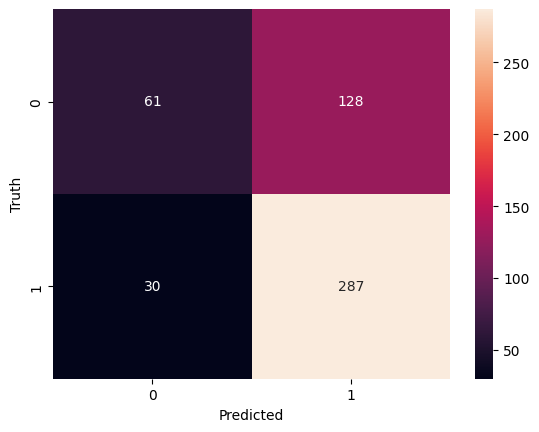

In [8]:
predicted = classifier.predict(X_test)
predicted = [1 if el>0.5 else 0 for el in predicted]

#print("acc: ", accuracy_score(y_test, np.array(predicted)))
#print("f1: ",f1_score(y_test, predicted,average=None))

cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [9]:
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

texts = [el[2] for el in data_list]

distortions = [el[6] for el in data_list]
questions = list(map(remove_stop_words,texts))

sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

questions_embeded = sbert_model.encode(questions)

X_train, X_test, y_train, y_test = train_test_split(questions_embeded, distortions, test_size=0.2)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
classifier = KNeighborsClassifier(n_neighbors=7, p=13, metric='euclidean')
classifier.fit(X_train,y_train)
 
classifier.predict(X_test)
print(f"acc {classifier.n_neighbors}/{classifier.metric}: ",accuracy_score(y_test,pred))

acc 7/euclidean:  0.6146245059288538


acc:  0.6936758893280632
f1:  [0.34599156 0.8       ]


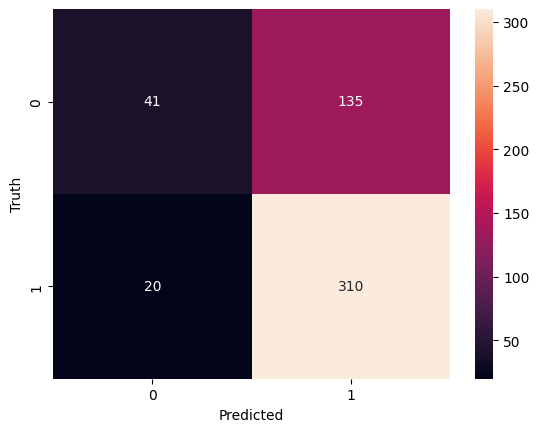

In [11]:
predicted = classifier.predict(X_test)
predicted = [1 if el>0.5 else 0 for el in predicted]

#print("acc: ", accuracy_score(y_test, np.array(predicted)))
#print("f1: ",f1_score(y_test, predicted,average=None))

print("acc: ", accuracy_score(y_test, predicted))
print("f1: ",f1_score(y_test, predicted,average=None))

cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()